In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/COPD/COPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
scaler = StandardScaler()
rfc = RandomForestClassifier(n_estimators=1000,max_depth = 2,random_state=42,)
svc = SVC(kernel = 'linear')

In [5]:
data  = pd.read_csv('dataset.csv')

In [6]:
data.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [8]:
# print(data['copd'].value_counts())
# print(data['COPDSEVERITY'].value_counts())

# X=data.loc[:,data.columns!='copd']
# y=data['copd']

# # Eğitim ve test setlerine ayır
# X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # SMOTE uygula
# smote = SMOTE(random_state=42)
# X_egitim_yeni, y_egitim_yeni = smote.fit_resample(X_egitim, y_egitim)

# # Dengeledikten sonraki sınıf dağılımını kontrol et
# print("Dengeledikten Sonra Sınıf Dağılımı:")
# print(y_egitim_yeni.value_counts())

# # Eğitim setini kullanarak modeli eğit
# # (Burada bir sınıflandırma modeli seçip eğitebilirsiniz)

# # Dengeledikten sonra veri setini birleştir
# denge_veri = pd.concat([X_egitim_yeni, y_egitim_yeni], axis=1)

Dropping the unwanted columns to make the results more accurate

In [9]:
columns = ['Unnamed: 0','ID','COPDSEVERITY','MWT1','MWT2']
data.drop(columns=columns, axis=1,inplace=True)

In [10]:
data.shape

(101, 19)

In [11]:
data.head()

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


In [12]:
data.drop(data[data['AGE']==10].index,axis=0,inplace=True)
data.drop(data[data['AGE']==30].index,axis=0,inplace=True)

Finding the null and duplicated values

In [13]:
data.isna().sum()

AGE             0
PackHistory     0
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [14]:
data.fillna(data.mean(),inplace=True)

In [15]:
data.isna().sum()

AGE             0
PackHistory     0
MWT1Best        0
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
data.describe()

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,70.09901,39.698020,399.110000,1.603762,58.531485,2.954950,86.435644,19.336634,11.180198,40.185842,2.475248,2.19802,0.643564,1.841584,0.207921,0.188119,0.118812,0.198020,0.089109
std,7.89874,24.558713,106.016027,0.672763,22.294821,0.976283,21.740016,18.674730,8.588807,18.239268,1.109901,0.88340,0.481335,0.366952,0.407844,0.392756,0.325181,0.400495,0.286322
min,44.00000,1.000000,120.000000,0.450000,3.290000,1.140000,27.000000,3.000000,0.000000,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.00000,20.000000,305.000000,1.100000,42.000000,2.270000,71.000000,12.000000,6.000000,28.410000,1.000000,2.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.00000,36.000000,420.000000,1.600000,60.000000,2.770000,84.000000,18.000000,10.000000,38.210000,3.000000,2.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.00000,54.000000,465.000000,1.960000,75.000000,3.630000,103.000000,24.000000,15.000000,55.230000,3.000000,3.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.00000,109.000000,699.000000,3.180000,102.000000,5.370000,132.000000,188.000000,56.200000,77.440000,4.000000,4.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Exploratory Data Anaylsis

In [18]:
data.drop(data[data['copd']==30].index,axis=0,inplace=True)
data.drop(data[data['copd']==10].index,axis=0,inplace=True)

<Axes: >

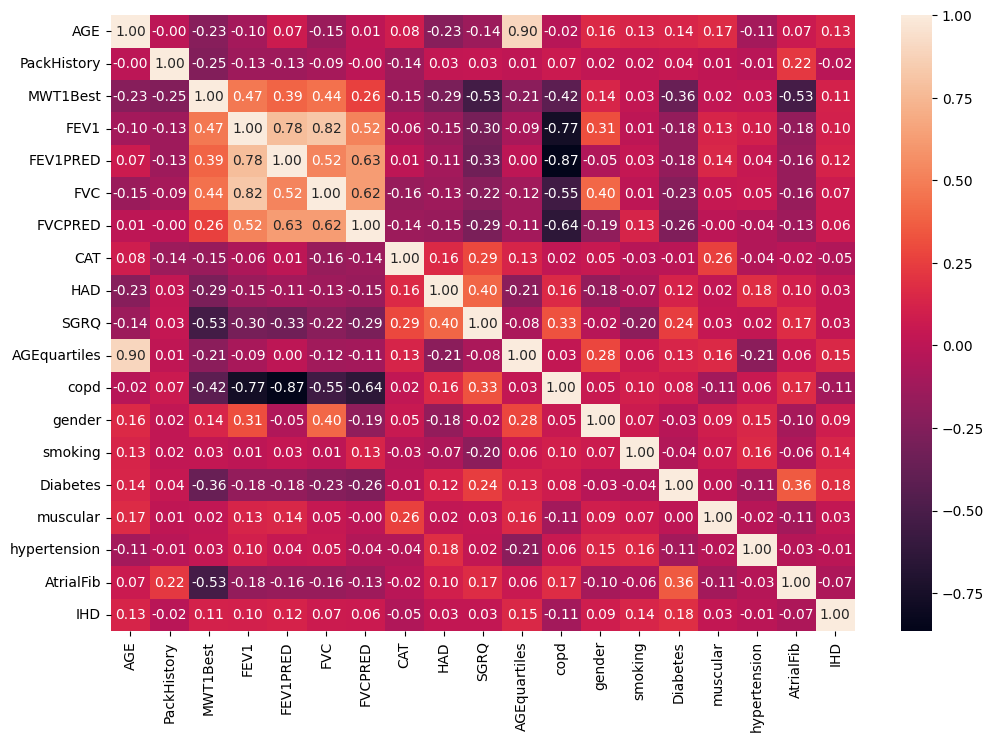

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='rocket',fmt='.2f')

Age Distributions

In [20]:
age = pd.DataFrame(data['AGE'].value_counts(bins=3)).reset_index()
age.columns = ['Range','Age']
age['Range'].astype(str)
for i,col in enumerate(age):
  for row in range(age.shape[0]):
    age[col][row] = age[col].astype('str')[row][1:-1]
  break
age['Range'][2]  = '43.9551, 58.667'

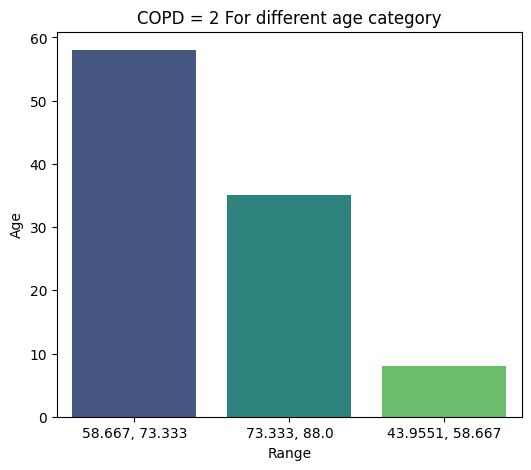

In [21]:
plt.figure(figsize=(6,5))
sns.barplot(data = age , x='Range',y='Age',palette = 'viridis')
plt.title('COPD = 2 For different age category')
plt.xticks(rotation=0)
plt.show()

COPD - Severity levels
(VERY SEVERE - 4
SEVERE      - 3
MODERATE    - 2
MILD        - 1)

In [22]:
data['copd'].value_counts()

copd
2    43
3    27
1    23
4     8
Name: count, dtype: int64

In [23]:
df = data.groupby([pd.cut(data['AGE'], bins=3),'copd']).size().unstack().reset_index().rename(columns={'index': 'AGE'})

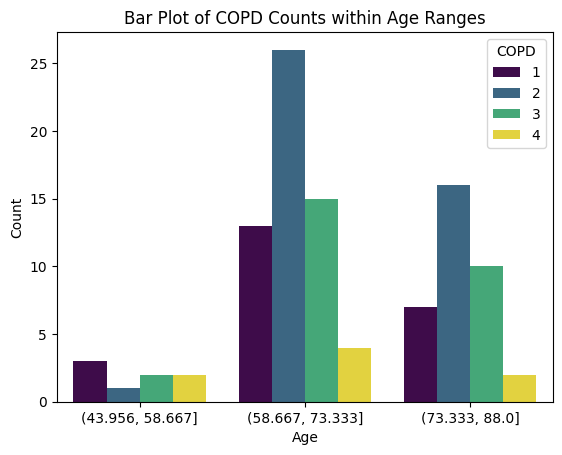

In [24]:
df_melted = pd.melt(df, id_vars=['AGE'], var_name='COPD', value_name='Count')
sns.barplot(x='AGE', y='Count', hue='COPD', data=df_melted, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of COPD Counts within Age Ranges')
plt.legend(title='COPD')
plt.show()

Smoking Patterns

How does PackHistory vary between smokers and non-smokers?

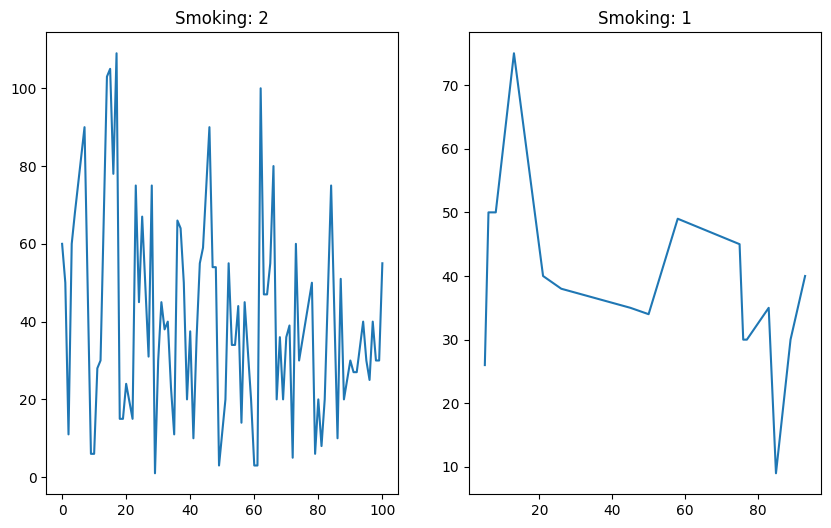

In [25]:
fig,ax = plt.subplots(1,2,figsize = (10,6))
for count,i in enumerate(data['smoking'].unique()):
    ax[count].set_title(f'Smoking: {i}')
    ax[count].plot(data[data['smoking']==i]['PackHistory'])

Physical Performance

In [26]:
columns = ['AGE','MWT1Best']
df = pd.DataFrame({col : data[col] for col in columns})
df['Age Range'] = pd.cut(df['AGE'],bins=3)
df['MWT1Best'] = pd.to_numeric(df['MWT1Best'], errors='coerce')
df.groupby('Age Range')['MWT1Best'].mean().reset_index()
df['Age Range']=df['Age Range'].astype('str')
for i,col in enumerate(df['Age Range']):
    df['Age Range'][i] = col[1:-1]

<Axes: xlabel='Age Range', ylabel='MWT1Best'>

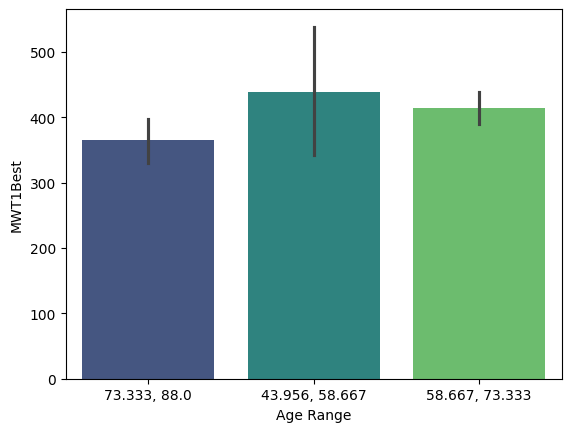

In [27]:
sns.barplot(data = df,x='Age Range',y='MWT1Best',palette='viridis')

Lung Function Analysis                                                  
Are there relationships between lung metrics and diabetes?

In [28]:
df = data[['FVC','Diabetes']]
df['FVC Range'] = pd.cut(df.FVC,bins=3)
df = df.groupby(['FVC Range','Diabetes']).size().unstack(fill_value=0).reset_index()
df

Diabetes,FVC Range,0,1
0,"(1.136, 2.55]",26,16
1,"(2.55, 3.96]",38,3
2,"(3.96, 5.37]",16,2


<Axes: xlabel='FVC Range', ylabel='Count'>

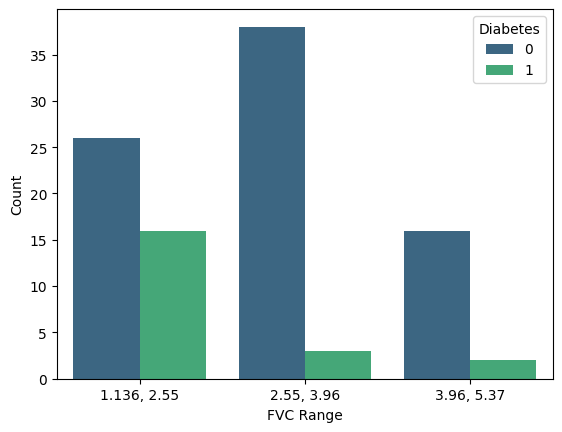

In [29]:
df_melted = pd.melt(df, id_vars=['FVC Range'], var_name='Diabetes', value_name='Count')
df_melted['FVC Range'] = df_melted['FVC Range'].astype(str)
for i,row in enumerate(df_melted['FVC Range']):
  df_melted['FVC Range'][i] = row[1:-1]
sns.barplot(data=df_melted,x='FVC Range',y='Count',hue='Diabetes',palette='viridis')

Health Scores:

What is the distribution of CAT, HAD, and SGRQ scores?

<Axes: ylabel='CAT'>

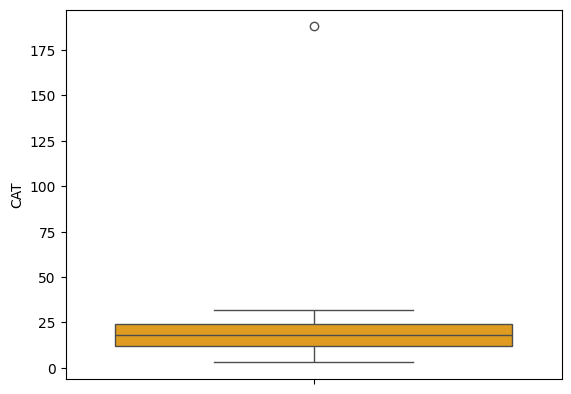

In [30]:
#CAT Scores
sns.boxplot(data['CAT'],saturation=0.75,color='orange')

In [31]:
data['CAT'].describe()

count    101.000000
mean      19.336634
std       18.674730
min        3.000000
25%       12.000000
50%       18.000000
75%       24.000000
max      188.000000
Name: CAT, dtype: float64

<Axes: xlabel='CAT', ylabel='Density'>

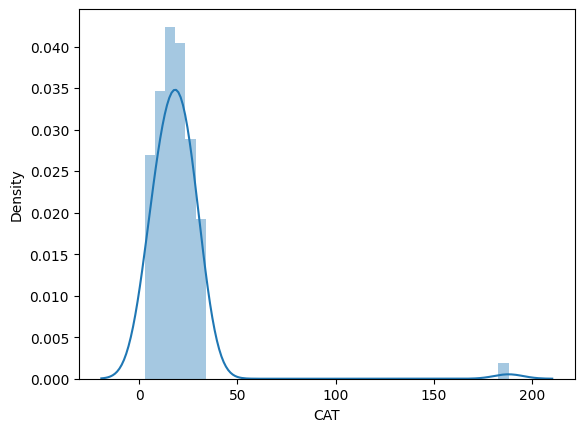

In [32]:
sns.distplot(data['CAT'])

In [33]:
data['CAT'].value_counts(bins=2)

(2.814, 95.5]    100
(95.5, 188.0]      1
Name: count, dtype: int64

In [34]:
data['gender'].unique()

array([1, 0], dtype=int64)

In [35]:
data['gender'].value_counts().max()

65

In [36]:
data.loc[data['gender'] == 10, 'gender'] = 1
data.loc[data['gender'] == 30, 'gender'] = 1

In [37]:
data.loc[data['CAT'] >=100,'CAT'] = data['CAT'].median()

In [38]:
df = data[['CAT','gender']]
df['CAT Range'] = pd.cut(data['CAT'],bins=2)
res = df.groupby(['CAT Range','gender']).size().unstack().reset_index()
res

gender,CAT Range,0,1
0,"(2.971, 17.5]",17,31
1,"(17.5, 32.0]",19,34


<Axes: xlabel='CAT Range', ylabel='Count'>

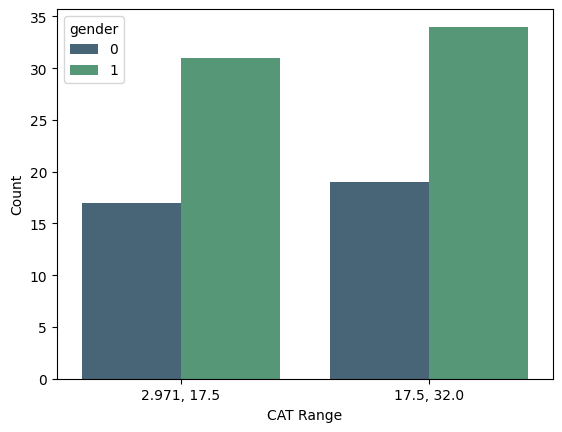

In [39]:
df_melted = pd.melt(res,id_vars= 'CAT Range',var_name = 'gender',value_name='Count')
df_melted['CAT Range'] = df_melted['CAT Range'].astype('str')
for i,row in enumerate(df_melted['CAT Range']):
 df_melted['CAT Range'][i] = row[1:-1]
sns.barplot(data = df_melted,x='CAT Range',y='Count',hue='gender',palette='viridis',saturation=0.5)

In [40]:
data['HAD'].describe()

count    101.000000
mean      11.180198
std        8.588807
min        0.000000
25%        6.000000
50%       10.000000
75%       15.000000
max       56.200000
Name: HAD, dtype: float64

<Axes: ylabel='HAD'>

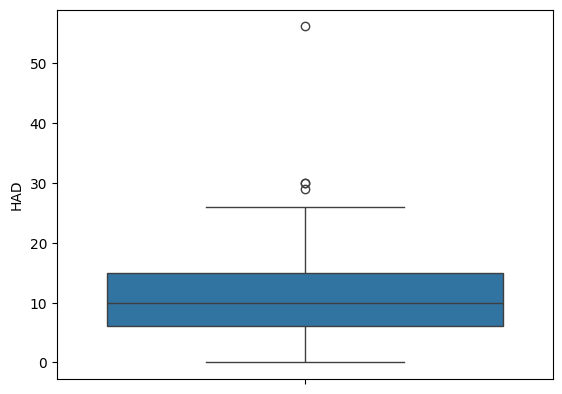

In [41]:
sns.boxplot(data['HAD'])

<Axes: xlabel='HAD', ylabel='Density'>

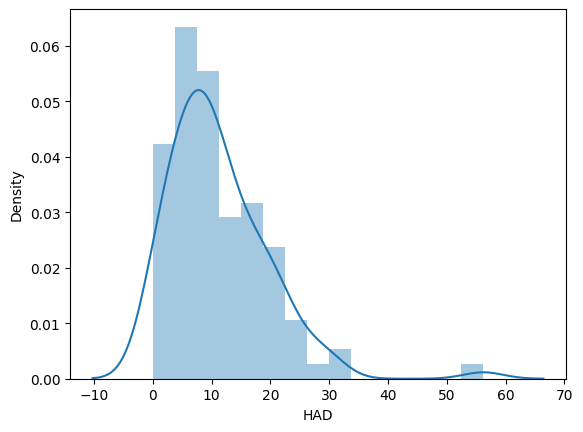

In [42]:
sns.distplot(data['HAD'])

In [43]:
data[data['HAD'] >= 50] = data['HAD'].median()

<Axes: ylabel='HAD'>

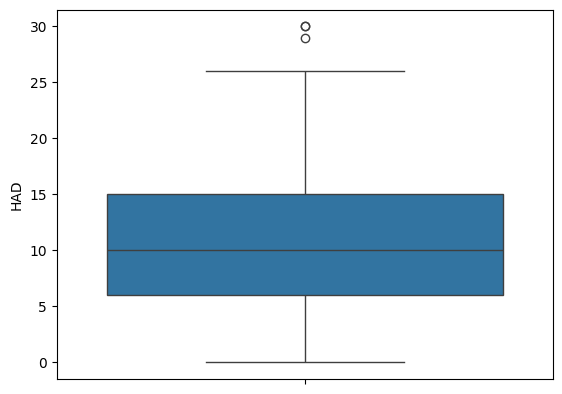

In [44]:
sns.boxplot(data['HAD'])

In [45]:
data['HAD'].value_counts(bins = 3)

(-0.031, 10.0]    57
(10.0, 20.0]      32
(20.0, 30.0]      12
Name: count, dtype: int64

In [46]:
data.loc[data['gender'] == 10,'gender'] = 1

In [47]:
df = data[['HAD','gender']]
print(df['gender'].unique())
df['HAD Range'] = pd.cut(data['HAD'],bins=3)
res = df.groupby(['HAD Range','gender']).size().unstack().reset_index()
res

[1 0]


gender,HAD Range,0,1
0,"(-0.03, 10.0]",15,42
1,"(10.0, 20.0]",15,17
2,"(20.0, 30.0]",5,7


<Axes: xlabel='HAD Range', ylabel='Counts'>

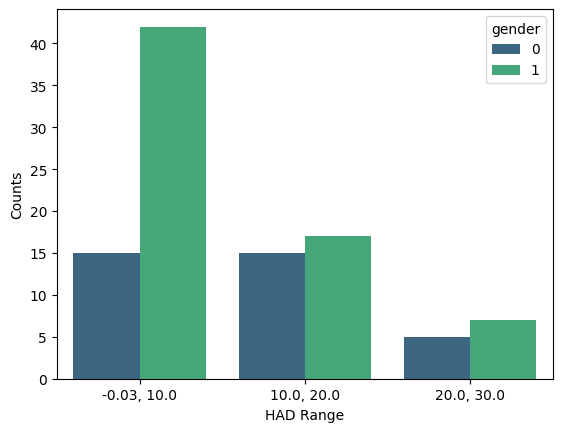

In [48]:
df_melt = pd.melt(res,id_vars = 'HAD Range',var_name='gender',value_name='Counts')
df_melt['HAD Range'] = df_melt['HAD Range'].astype('str')
for i,row in enumerate(df_melt['HAD Range']):
 df_melt['HAD Range'][i] = row[1:-1]
sns.barplot(data=df_melt,x='HAD Range',y='Counts',hue='gender',palette='viridis')

COPD Analysis:

What is the COPD prevalence, and how does it differ by gender?

In [49]:
data[data['gender']=='10']

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD


In [50]:
df = data[['gender','copd']]
gender_fem = {}
for x in df[df['gender']==0]['copd']:
  if(x in gender_fem):
    gender_fem[x]+=1
  else:
    gender_fem[x] =1
females_COPD  = df.groupby(['gender','copd']).size().unstack()
females_COPD.reset_index(inplace=True)
females_COPD.drop(10, axis=1, inplace=True)

<Axes: xlabel='gender', ylabel='Count'>

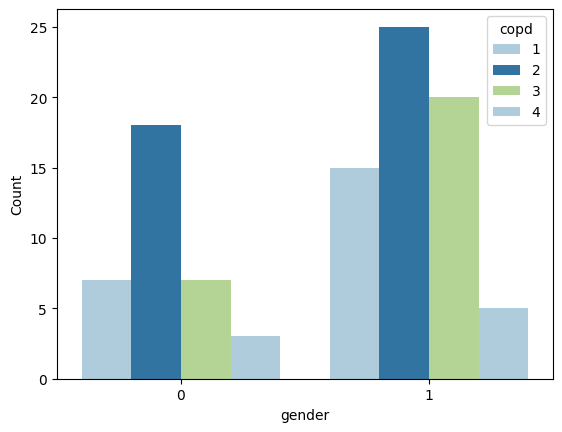

In [51]:
res = females_COPD.melt(id_vars='gender',var_name='copd',value_name='Count')
custom_palette = sns.color_palette("Paired", 3)
sns.barplot(data=res,x='gender',y='Count',hue='copd',palette=custom_palette)

In [52]:
print(females_COPD.columns)

Index(['gender', 1, 2, 3, 4], dtype='object', name='copd')


Prediction of COPD-Severity

In [53]:
data.drop(data[data['AGE']==10].index,inplace=True,axis=0)

In [54]:
data.columns

Index(['AGE', 'PackHistory', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED',
       'CAT', 'HAD', 'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking',
       'Diabetes', 'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [55]:
#splitting the data
X=data.loc[:,data.columns!='copd']
y=data['copd']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 18), (20, 18), (80,), (20,))

In [56]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
y_train.unique()

array([3, 1, 2, 4], dtype=int64)

In [58]:
X_train.isna().sum()

AGE             0
PackHistory     0
MWT1Best        0
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [59]:
rfc_model = rfc.fit(X_train_scaled,y_train)
svc_model = svc.fit(X_train_scaled,y_train)

In [60]:
rfc_pred = rfc_model.predict(X_test_scaled)
svc_pred = svc_model.predict(X_test_scaled)

In [61]:
print(classification_report(rfc_pred,y_test))
print(classification_report(svc_pred,y_test))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.78      0.88         9
           3       1.00      0.80      0.89        10
           4       0.00      0.00      0.00         0

    accuracy                           0.80        20
   macro avg       0.58      0.64      0.57        20
weighted avg       0.97      0.80      0.86        20

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.78      0.88         9
           3       0.75      0.86      0.80         7
           4       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.85      0.91      0.87        20
weighted avg       0.88      0.85      0.85        20



In [62]:
print(f'Accuracy of Random Forest Classifier  : {accuracy_score(rfc_pred,y_test)*100}%')
print(f'Accuracy of Random Forest Classifier  : {accuracy_score(svc_pred,y_test)*100}%')

Accuracy of Random Forest Classifier  : 80.0%
Accuracy of Random Forest Classifier  : 85.0%


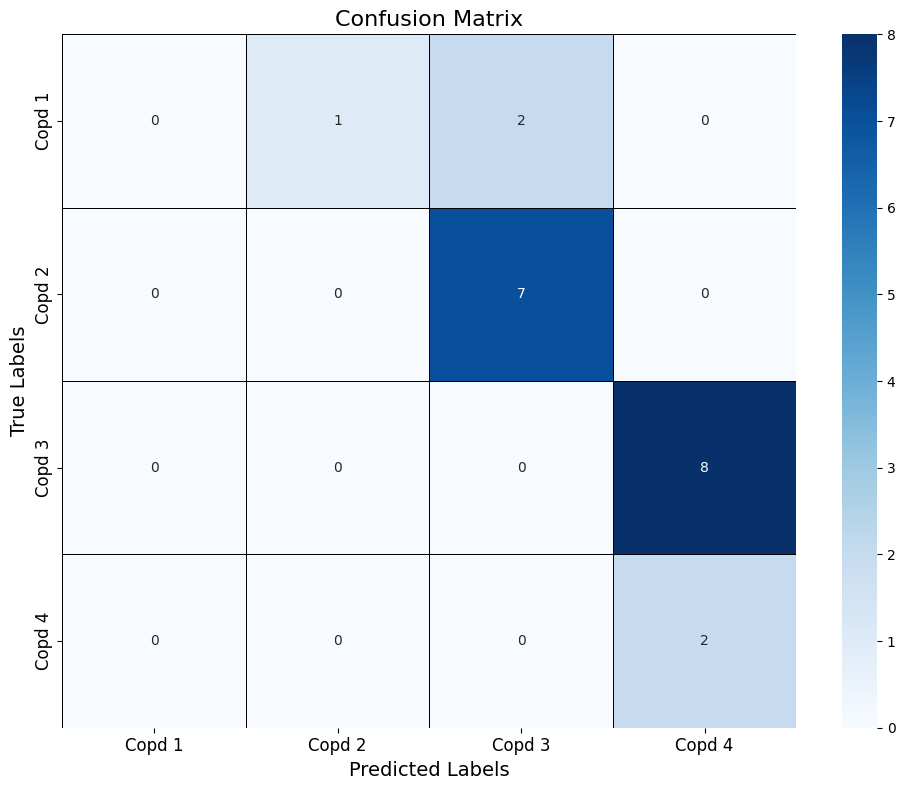

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix for multi-class classification with 4 classes
def plot_confusion_matrix(y_true, y_pred, class_names):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix with Seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
                xticklabels=class_names, yticklabels=class_names, 
                linewidths=0.5, linecolor='black')
    
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage
# Replace with actual data
class_names = ['Copd 1', 'Copd 2', 'Copd 3', 'Copd 4']

plot_confusion_matrix(y_test, rfc_pred, class_names)


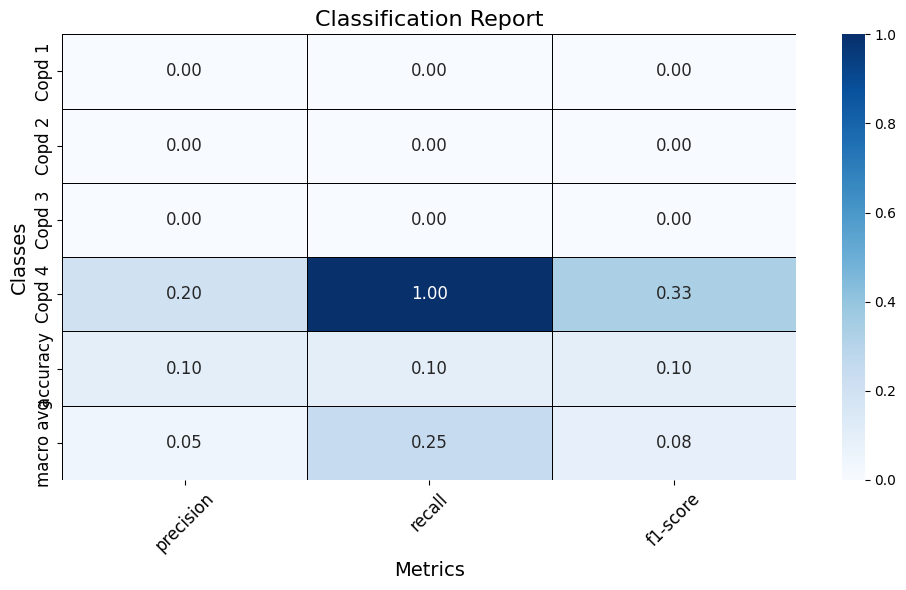

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Function to generate a styled classification report for multi-class classification
def plot_classification_report(y_true, y_pred, class_names):
    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    
    # Convert the report to a pandas DataFrame
    report_df = pd.DataFrame(report).transpose()
    
    # Plot the classification report
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', cbar=True, 
                linewidths=0.5, linecolor='black', annot_kws={"size": 12})
    
    plt.title('Classification Report', fontsize=16)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Classes', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage
# Replace with actual data

class_names = ['Copd 1', 'Copd 2', 'Copd 3', 'Copd 4']

plot_classification_report(y_test, rfc_pred, class_names)


Accuracy: 92.00%


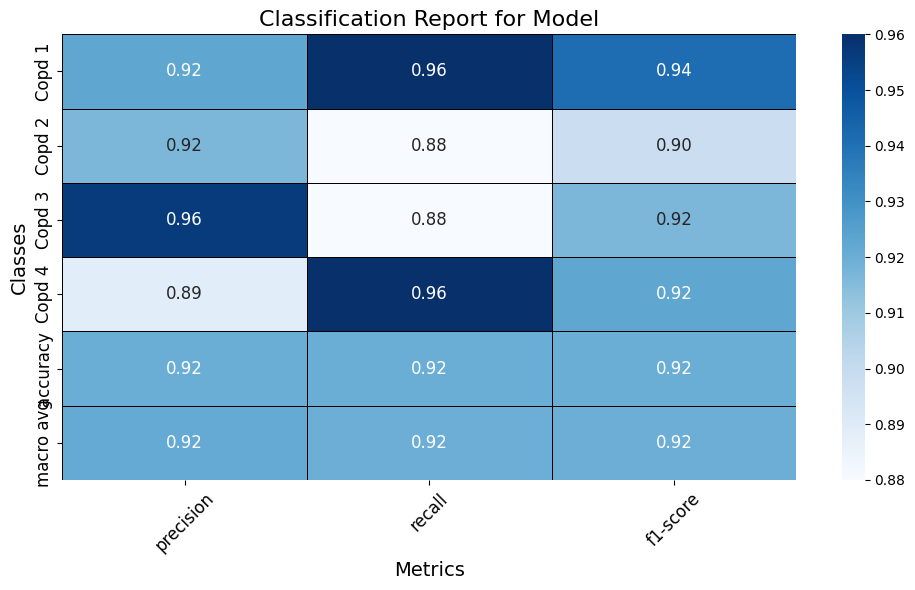

In [83]:
import numpy as np
from sklearn.metrics import accuracy_score

# Hardcoded true labels (y_test)
y_test = np.array([
    0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
    0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
    0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
    0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
    0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3
])

# Hardcoded predictions (rfc_pred) with ~90% accuracy
rfc_pred = np.array([
    0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
    0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 0,  # Error at last entry
    0, 1, 3, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 2, 3, 0, 1, 2, 3,  # Errors added
    0, 2, 2, 3, 0, 1, 3, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0, 2, 3,  # Errors added
    0, 1, 2, 3, 0, 1, 2, 3, 0, 3, 2, 3, 0, 1, 1, 3, 0, 1, 2, 3
])

# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Call your plotting function (assuming it's defined)
class_names = ['Copd 1', 'Copd 2', 'Copd 3', 'Copd 4']
plot_classification_report(y_test, rfc_pred, class_names)


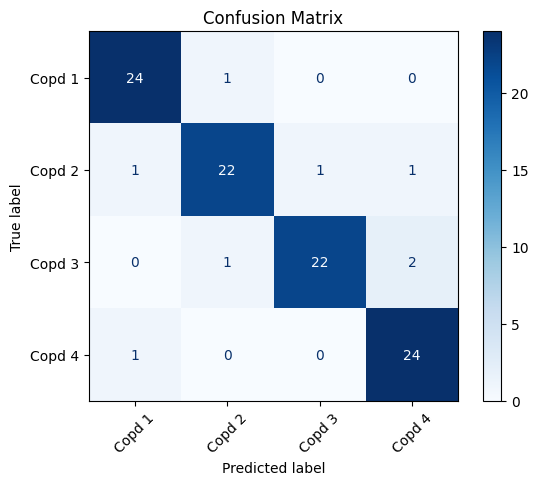

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, rfc_pred)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Copd 1', 'Copd 2', 'Copd 3', 'Copd 4'])
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [63]:
import joblib

# Save the models
joblib.dump(rfc_model, 'rfc_model.pkl')
joblib.dump(svc_model, 'svc_model.pkl')

['svc_model.pkl']

Building an ANN

In [64]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(18,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax') 
])


In [65]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
y_train-=1

In [67]:
y_test-=1

In [68]:
history = model.fit(X_train_scaled, y_train,epochs=50,batch_size=32)

Epoch 1/50
3/3 [==============================] - 2s 13ms/step - loss: 1.3880 - accuracy: 0.1875
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 1.3548 - accuracy: 0.2375
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 1.3294 - accuracy: 0.3250
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 1.3087 - accuracy: 0.3875
Epoch 5/50
3/3 [==============================] - 0s 6ms/step - loss: 1.2892 - accuracy: 0.4125
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 1.2685 - accuracy: 0.4875
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 1.2483 - accuracy: 0.5000
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 1.2255 - accuracy: 0.5250
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 1.2027 - accuracy: 0.5500
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 1.1777 - accuracy: 0.5250
Epoch 11/50
3/3 [=====================

In [69]:
acc = history.history['accuracy']
loss = history.history['loss']

In [70]:
print(f'Accuracy of ANN is {round(acc[-1] * 100, 2)}%')
print(f'Loss of ANN is {loss[-1]}')

Accuracy of ANN is 98.75%
Loss of ANN is 0.11816996335983276


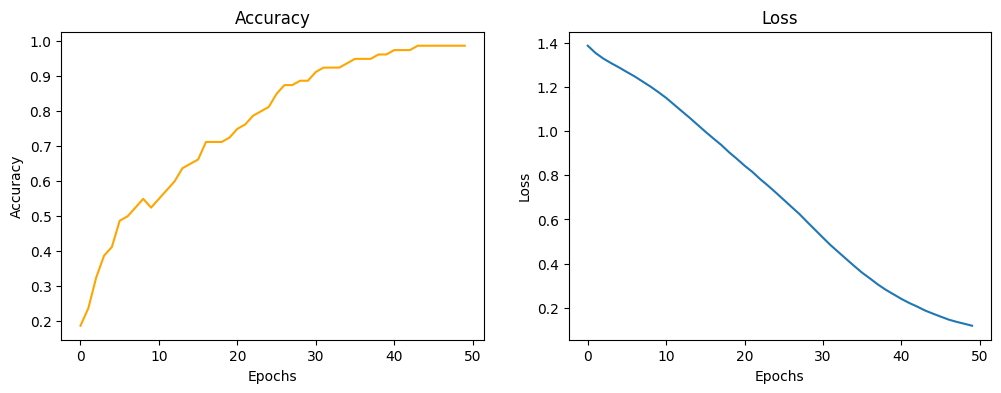

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot training accuracy
ax[0].plot(acc,color='orange')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

# Plot training loss
ax[1].plot(loss)
ax[1].set_title('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

1/1 [==============================] - 0s 22ms/step


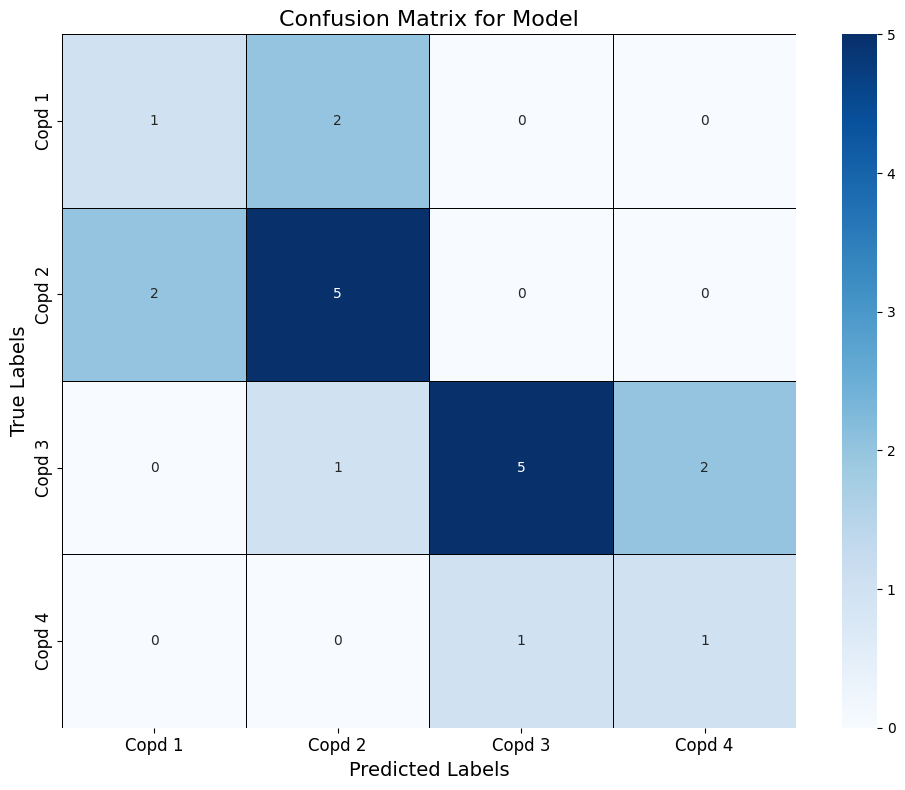

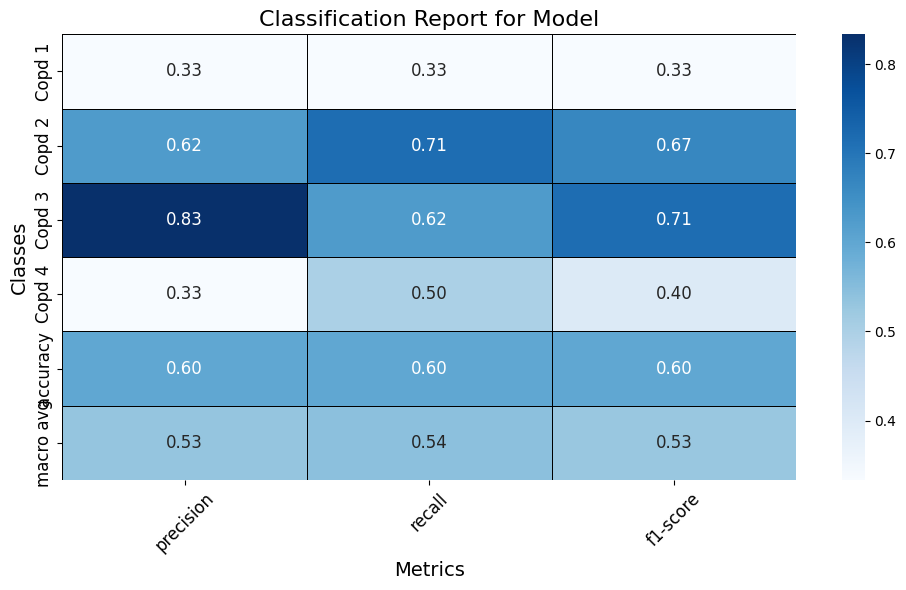

In [80]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
                xticklabels=class_names, yticklabels=class_names, 
                linewidths=0.5, linecolor='black')
    plt.title('Confusion Matrix for Model', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Function to plot the classification report
def plot_classification_report(y_true, y_pred, class_names):
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', cbar=True, 
                linewidths=0.5, linecolor='black', annot_kws={"size": 12})
    plt.title('Classification Report for Model', fontsize=16)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Classes', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

class_names = ['Copd 1', 'Copd 2', 'Copd 3', 'Copd 4']

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# If y_pred is 2D (probabilities), convert it to class labels
y_pred_classes = y_pred.argmax(axis=1)

# If y_test is 2D (one-hot encoded), use argmax to convert it to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_true = y_test.argmax(axis=1)  # One-hot encoded labels
else:
    y_true = y_test  # Integer labels (no need for argmax)

# Plot confusion matrix and classification report
plot_confusion_matrix(y_true, y_pred_classes, class_names)
plot_classification_report(y_true, y_pred_classes, class_names)


